In [1]:
import tensorflow as tf
import numpy as np

In [2]:
X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

In [3]:
import matplotlib.pyplot as plt

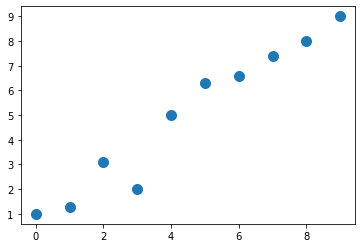

In [4]:
plt.plot(X_train, y_train, 'o', markersize=10)

In [5]:
# what is this for...?
X_train_normalized = (X_train - np.mean(X_train))/np.std(X_train)

In [6]:
ds_train_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_normalized, tf.float32),
                                                   (tf.cast(y_train, tf.float32))))

In [7]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')
    
    def call(self, x):
        return self.w * x + self.b

In [8]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
        
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [10]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train)/ batch_size))

ds_train = ds_train_orig.shuffle(buffer_size = len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []

In [11]:
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    
    train(model, bx, by, learning_rate=learning_rate)
    
    if i % log_steps == 0:
        print(f"Epoch {round(int(i/steps_per_epoch), 4)} Step {i} Loss {round(float(loss_val), 3)}")

Epoch 0 Step 0 Loss 43.56
Epoch 10 Step 100 Loss 0.753
Epoch 20 Step 200 Loss 20.176
Epoch 30 Step 300 Loss 23.398
Epoch 40 Step 400 Loss 6.348
Epoch 50 Step 500 Loss 4.636
Epoch 60 Step 600 Loss 0.241
Epoch 70 Step 700 Loss 0.204
Epoch 80 Step 800 Loss 3.818
Epoch 90 Step 900 Loss 0.942
Epoch 100 Step 1000 Loss 0.703
Epoch 110 Step 1100 Loss 0.035
Epoch 120 Step 1200 Loss 0.54
Epoch 130 Step 1300 Loss 0.117
Epoch 140 Step 1400 Loss 0.119
Epoch 150 Step 1500 Loss 0.094
Epoch 160 Step 1600 Loss 0.467
Epoch 170 Step 1700 Loss 2.069
Epoch 180 Step 1800 Loss 0.002
Epoch 190 Step 1900 Loss 0.361


In [18]:
X_test = np.linspace(0, 9, num=100).reshape(-1,1)
X_test_normalized = (X_test - np.mean(X_train) / np.std(X_train))

# predicting using our previously trained model
y_pred = model(tf.cast(X_test_normalized, dtype=tf.float32))

Using Keras API for easier use.

In [29]:
tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer= 'sgd',
              loss=loss_fn,
              metrics=["mae", "mse"])

model.fit(X_train_normalized, y_train,
          epochs=num_epochs,
          batch_size = batch_size,
          verbose = 1)

### Building multilayer perceptron for classifying flowers in Iris dataset using Keras

In [32]:
from sklearn import datasets

In [33]:
iris = datasets.load_iris()

In [36]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
import tensorflow_datasets as tfds 
iris, iris_info = tfds.load('iris', with_info=True)

Shuffling and writing examples to C:\Users\haneu\tensorflow_datasets\iris\2.0.0.incompletePERIFH\iris-train.tfrecord


Dataset iris downloaded and prepared to C:\Users\haneu\tensorflow_datasets\iris\2.0.0. Subsequent calls will reuse this data.


In [46]:
ds_orig = iris["train"]
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

In [55]:
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

In [62]:
ds_train_orig = ds_train_orig.map(lambda x: (x["features"], x["label"]))

ds_test = ds_test.map(lambda x: (x["features"], x["label"]))

In [63]:
iris_model = tf.keras.Sequential([tf.keras.layers.Dense(16, 
                                                        activation='sigmoid',
                                                        name="fc1",
                                                        input_shape=(4,)),
                                  tf.keras.layers.Dense(3, 
                                                        activation='softmax',
                                                        name="fc2")])

In [64]:
iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [65]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=["accuracy"])

In [68]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

In [71]:
ds_train = ds_train_orig.shuffle(buffer_size = training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size = batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

<ShuffleDataset shapes: ((4,), ()), types: (tf.float32, tf.int64)>
<RepeatDataset shapes: ((4,), ()), types: (tf.float32, tf.int64)>
<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float32, tf.int64)>


In [72]:
history = iris_model.fit(ds_train, 
                         epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose=0)

In [75]:
hist = history.history

In [78]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)

In [79]:
results

[0.1425916701555252, 1.0]

In [80]:
print('Test loss :{:.4f}  Test Acc {:.4f}'.format(*results))

Test loss :0.1426  Test Acc 1.0000


In [81]:
iris_model.save('iris-classifier.h5', overwrite=True, include_optimizer=True, save_format='h5')

In [82]:
x = tf.keras.models.load_model('iris-classifier.h5')

In [1]:
import tensorflow as tf

In [3]:
a = tf.constant(1, name="a")
b = tf.constant(2, name="b")
c = tf.constant(3, name="c")

In [6]:
a

<tf.Tensor: id=1, shape=(), dtype=int32, numpy=1>

In [7]:
b

<tf.Tensor: id=2, shape=(), dtype=int32, numpy=2>

In [8]:
c

<tf.Tensor: id=3, shape=(), dtype=int32, numpy=3>

In [11]:
tf.print(2*(a-b) + c)


1
